# Análisis de COVID-19 para la Fase 1

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import date
import calendar
import string
import datetime

In [2]:
covidF1 = pd.read_excel('COVID19F1.xlsx', sheet_name='Respuestas de formulario 1')

In [3]:
covidF1

,Marca temporal,Dirección de correo electrónico,Puntuación,Edad,Ciudad,Colonia,Teléfono de contacto,¿Te duele la garganta?,¿Tienes fiebre?,¿Cuántos días tienes con fiebre?,...,¿Tienes dolor en tu pecho?,¿Te ha revisado algún médico en los últimos 5 días?,¿Dónde?,¿Conoces a alguien con enfermedad por COVID-19 confirmada?,¿Estuviste en contacto con esa persona en los últimos 5 días?,¿Regresaste recientemente de algún vuelo internacional?,¿Hace cuánto tiempo regresaste de tu viaje?,¿Estuviste en alguno de los siguientes países?,Código postal,Contestado
0,2020-03-18 09:41:11.924000,NaN,4,32,NaN,Atemajac del Valle,3.312051e+09,No,Sí,NaN,...,Sí,No,NaN,No,No,Sí,NaN,Alemania,NaN,NaN
1,2020-03-18 09:54:55.465000,jhugosaldor@gmail.com,4,30,NaN,Lomas de Zapopan,3.310968e+09,Sí,No,NaN,...,NaN,Sí,NaN,Sí,No,Sí,4,"España, Alemania, Francia, Italia, Rep Checa, ...",NaN,NaN
2,2020-03-18 10:03:35.530000,mtezruizlupita@gmail.com,7,28,NaN,La Perla,3.331875e+09,Sí,Sí,3.0,...,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-18 10:09:09.460000,joelini.inq@gmail.com,2,28,Guadalajara,Alcalde barranquitas,3.314708e+09,Sí,No,NaN,...,NaN,No,0,No,No,No,NaN,NaN,NaN,NaN
4,2020-03-18 10:29:47.497000,anba_osabel@hotmail.com,3,38,Zapopan,Unidad habitacional UAG,3.314667e+09,Sí,No,NaN,...,NaN,Sí,ISSSTE,Sí,No,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15168,2020-03-24 18:44:24.829000,vipofxandrah@hotmail.com,2,34,GUADALAJARA,jardines del sur,3.317964e+09,Sí,No,NaN,...,NaN,No,NaN,No,No,No,NaN,NaN,44950.0,Enviado Automático
15169,2020-03-24 18:46:14.151000,maria.zepeda33@gmail.com,2,20,San Martín Hidalgo,Centro,3.751084e+09,No,No,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46770.0,Enviado Automático
15170,2020-03-24 18:46:22.080000,iza-bela98@hotmail.com,3,23,Puebla,Cuapiaxtla de Madero,2.491381e+09,No,No,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75420.0,Enviado Automático
15171,2020-03-24 18:46:26.583000,angie.oita@hotmail.com,4,39,Querétaro,Jardines de santiago,4.424521e+09,Sí,No,NaN,...,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76148.0,Enviado Automático


### Explotación y prepocesamiento de los datos

In [4]:
print("Tamaño del dataset")
print("Número de respuestas: " + str(covidF1.shape[0]))
print("Número de columnas: " + str(covidF1.shape[1]))

Tamaño del dataset
Número de respuestas: 15173
Número de columnas: 30


In [5]:
covidF1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15173 entries, 0 to 15172
Data columns (total 30 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Marca temporal                                                         15172 non-null  object 
 1   Dirección de correo electrónico                                        15172 non-null  object 
 2   Puntuación                                                             15173 non-null  object 
 3   Edad                                                                   15136 non-null  object 
 4   Ciudad                                                                 15132 non-null  object 
 5   Colonia                                                                15133 non-null  object 
 6   Teléfono de contacto                                                   15136 non-null 

In [6]:
covidF1.isnull().sum()

Marca temporal                                                               1
Dirección de correo electrónico                                              1
Puntuación                                                                   0
Edad                                                                        37
Ciudad                                                                      41
Colonia                                                                     40
Teléfono de contacto                                                        37
¿Te duele la garganta?                                                      37
¿Tienes fiebre?                                                             37
¿Cuántos días tienes con fiebre?                                         14055
¿Te tomaste la temperatura con un termómetro?                            14050
¿Cuánto registró el termómetro?                                          14319
¿Qué has tomado para la fiebre?                     

### Visualización de datos con histogramas 

In [7]:
covidF1.drop([13364],inplace=True)

In [8]:
covidF1[(covidF1["Edad"].astype(float))>100]

,Marca temporal,Dirección de correo electrónico,Puntuación,Edad,Ciudad,Colonia,Teléfono de contacto,¿Te duele la garganta?,¿Tienes fiebre?,¿Cuántos días tienes con fiebre?,...,¿Tienes dolor en tu pecho?,¿Te ha revisado algún médico en los últimos 5 días?,¿Dónde?,¿Conoces a alguien con enfermedad por COVID-19 confirmada?,¿Estuviste en contacto con esa persona en los últimos 5 días?,¿Regresaste recientemente de algún vuelo internacional?,¿Hace cuánto tiempo regresaste de tu viaje?,¿Estuviste en alguno de los siguientes países?,Código postal,Contestado
381,2020-03-18 17:56:07.391000,a@gm.com,1,111,S,S,5.555556e+09,No,No,NaN,...,NaN,Sí,NaN,No,No,No,NaN,NaN,NaN,NaN
2079,2020-03-20 11:51:51.134000,ggffgjjk@gmail.com,1,345,Hhok,G hi kk,1.258474e+07,Sí,No,NaN,...,NaN,No,NaN,No,No,No,NaN,NaN,NaN,NaN
2249,2020-03-20 14:58:43.446000,ximena.3570@gmail.com,3,6181333436,Durango,Colinas del Saltito,6.181333e+09,Sí,No,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34105.0,NaN
4145,2020-03-21 16:40:50.423000,putos@chibgarumadre.com,3,1600,Por tus pujidos,Nos encontraron,3.141592e+09,No,No,NaN,...,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44444.0,NaN
4180,2020-03-21 16:44:47.559000,juanmanuel@medicheck.mx,2,3311761040,Zapopan,L,1.000000e+00,No,No,NaN,...,NaN,No,Soy Juan Manuel Arellano. CEO de Medicheck. So...,Sí,No,Sí,1 semana y media,Estados Unidos,1.0,NaN
5812,2020-03-21 21:40:28.261000,dasfdsfsd@sdf.com,2,32432,dfsdf,fsdfsd,4.234234e+08,No,No,NaN,...,NaN,No,NaN,No,Sí,No,NaN,NaN,342423.0,Enviado Automático
7126,2020-03-22 08:20:37.668000,miswebs@conpelos.com,1,911,Aqui,Hugo boss,4.141667e+09,No,No,NaN,...,NaN,No,Aqui,No,Sí,No,NaN,NaN,90210.0,Enviado Automático
7689,2020-03-22 10:53:34.219000,aydemiss@gmail.com,3,1987,Zapopan Jalisco,ALTALUZ,3.336617e+09,Sí,No,NaN,...,NaN,Sí,Cruz verde,Sí,No,No,NaN,NaN,45017.0,Enviado Automático
11049,2020-03-22 23:26:23.085000,ggghhpmendezgg.gt@outlook.com,10,999,Hmmm,H,7.909565e+06,Sí,Sí,3.0,...,Sí,No,Bi,Sí,Sí,Sí,15,"España, Francia, Estados Unidos",100097.0,NaN


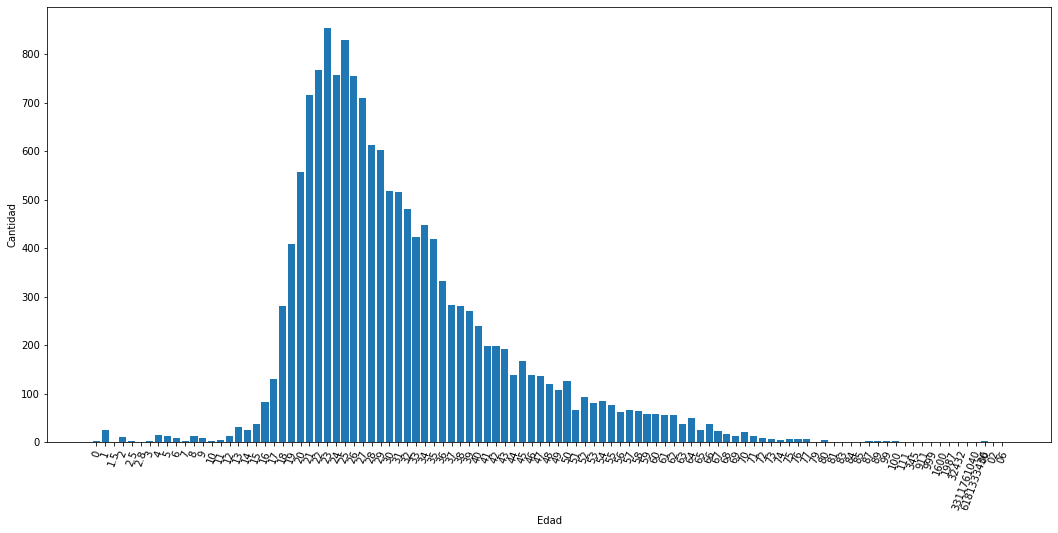

In [9]:
group_edad=covidF1.groupby(['Edad'],as_index=False).count()
group_edad=group_edad[["Edad","Marca temporal"]].rename(columns={'Marca temporal' : 'cantidad'})
plt.figure(figsize=(18,8))
plt.bar(group_edad["Edad"].astype(str),group_edad["cantidad"])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.xticks(rotation = 70)
plt.show()

In [10]:
covidF2 = covidF1[(covidF1["Edad"].astype(float))<100]

In [11]:
edades=[]
cont=0
for i in range(len(covidF1['Edad'])):
    try:
        edades.append(int(covidF1['Edad'][i]))
    except Exception as e:
        cont+=1
        print(e,cont,i)

cannot convert float NaN to integer 1 604
cannot convert float NaN to integer 2 1029
cannot convert float NaN to integer 3 1113
cannot convert float NaN to integer 4 1718
cannot convert float NaN to integer 5 1748
cannot convert float NaN to integer 6 3139
cannot convert float NaN to integer 7 3873
cannot convert float NaN to integer 8 4330
cannot convert float NaN to integer 9 4628
cannot convert float NaN to integer 10 6521
cannot convert float NaN to integer 11 7062
cannot convert float NaN to integer 12 7204
cannot convert float NaN to integer 13 7205
cannot convert float NaN to integer 14 7348
cannot convert float NaN to integer 15 7349
cannot convert float NaN to integer 16 7357
cannot convert float NaN to integer 17 8322
cannot convert float NaN to integer 18 8323
cannot convert float NaN to integer 19 8325
cannot convert float NaN to integer 20 8353
cannot convert float NaN to integer 21 9834
cannot convert float NaN to integer 22 10188
cannot convert float NaN to integer 23 10

In [12]:
#covidF1["Edad"].head()
#Comprobación
covidF1.loc[covidF1["Edad"] == 6181333436]

,Marca temporal,Dirección de correo electrónico,Puntuación,Edad,Ciudad,Colonia,Teléfono de contacto,¿Te duele la garganta?,¿Tienes fiebre?,¿Cuántos días tienes con fiebre?,...,¿Tienes dolor en tu pecho?,¿Te ha revisado algún médico en los últimos 5 días?,¿Dónde?,¿Conoces a alguien con enfermedad por COVID-19 confirmada?,¿Estuviste en contacto con esa persona en los últimos 5 días?,¿Regresaste recientemente de algún vuelo internacional?,¿Hace cuánto tiempo regresaste de tu viaje?,¿Estuviste en alguno de los siguientes países?,Código postal,Contestado
2249,2020-03-20 14:58:43.446000,ximena.3570@gmail.com,3,6181333436,Durango,Colinas del Saltito,6.181333e+09,Sí,No,NaN,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34105.0,NaN


In [13]:
covidF1[pd.isnull(covidF1.Edad)]

,Marca temporal,Dirección de correo electrónico,Puntuación,Edad,Ciudad,Colonia,Teléfono de contacto,¿Te duele la garganta?,¿Tienes fiebre?,¿Cuántos días tienes con fiebre?,...,¿Tienes dolor en tu pecho?,¿Te ha revisado algún médico en los últimos 5 días?,¿Dónde?,¿Conoces a alguien con enfermedad por COVID-19 confirmada?,¿Estuviste en contacto con esa persona en los últimos 5 días?,¿Regresaste recientemente de algún vuelo internacional?,¿Hace cuánto tiempo regresaste de tu viaje?,¿Estuviste en alguno de los siguientes países?,Código postal,Contestado
604,SIN DATOS18/3/2020 23:07:35,regi094@hotmail.co,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,2020-03-19 15:17:04.528000,gabrielagalez4@gmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,2020-03-19 16:42:28.713000,natalia.ramirezg@alumno.udg.mx,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1718,2020-03-19 23:55:03.589000,cedoniusmacedonio@gmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,2020-03-20 00:35:29.168000,agarciamartinez391@gmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3139,2020-03-21 09:12:31.020000,victor.abarca.n@gmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3873,2020-03-21 15:54:06.643000,yircar@hotmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4330,2020-03-21 17:06:26.551000,guadalupeduran512@gmakl.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4628,2020-03-21 17:48:41.421000,londons983@gmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6521,2020-03-22 00:05:08.746000,irenegalindo@gmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enviado Automático


In [14]:
for i in range(len(edades)):
    if edades[i]>=60:
        print(edades[i])

60
63
60
67
60
111
89
62
61
77
65
65
89
63
61
61
65
61
60
64
64
61
62
76
66
76
64
71
60
345
63
62
6181333436
62
63
64
76
64
64
61
62
68
99
71
62
76
61
70
61
63
64
61
70
61
62
65
74
65
60
65
60
62
63
67
67
62
62
66
67
73
68
74
61
64
68
60
62
71
63
71
65
65
61
71
65
67
65
62
64
70
67
1600
64
3311761040
64
67
61
66
60
62
63
61
64
75
62
70
64
64
61
84
61
60
65
66
62
65
66
66
63
65
63
69
64
61
63
63
63
72
64
61
70
67
68
66
64
61
60
60
75
72
64
61
67
64
62
63
61
61
77
67
62
70
60
63
66
66
62
87
68
63
69
62
62
77
61
61
71
64
66
62
67
60
70
32432
60
69
75
75
61
61
62
66
67
63
66
62
70
71
75
65
60
85
68
62
64
66
65
63
60
77
68
60
67
62
61
61
67
61
67
911
60
64
73
65
61
72
64
69
61
62
64
66
62
61
63
80
62
65
74
60
62
71
64
70
62
1987
61
60
87
63
61
61
61
83
65
72
71
61
62
66
62
60
66
64
67
69
60
62
60
76
68
66
60
65
65
67
63
60
64
69
62
60
68
65
69
64
61
69
63
60
66
72
64
73
60
73
60
65
70
68
70
70
63
71
60
64
70
62
80
63
71
66
66
64
60
61
62
61
66
62
60
68
68
75
60
67
64
66
64
64
64
62
60
61
64

In [15]:
covidF1.columns

Index(['Marca temporal', 'Dirección de correo electrónico', 'Puntuación',
       'Edad', 'Ciudad', 'Colonia', 'Teléfono de contacto',
       '¿Te duele la garganta?', '¿Tienes fiebre?',
       '¿Cuántos días tienes con fiebre?',
       '¿Te tomaste la temperatura con un termómetro?',
       '¿Cuánto registró el termómetro?', '¿Qué has tomado para la fiebre?',
       '¿Tienes tos?', '¿Cuántos días tienes con tos?',
       '¿Tu tos tiene flemas?', '¿Qué has tomado para la tos?',
       '¿Te cuesta trabajo respirar?', '¿Te sientes muy agitado?',
       '¿Alcanzas a terminar una frase sin tener que parar por falta de aire?',
       '¿Tienes dolor en tu pecho?',
       '¿Te ha revisado algún médico en los últimos 5 días?', '¿Dónde?',
       '¿Conoces a alguien con enfermedad por COVID-19 confirmada?',
       '¿Estuviste en contacto con esa persona en los últimos 5 días?',
       '¿Regresaste recientemente de algún vuelo internacional?',
       '¿Hace cuánto tiempo regresaste de tu viaje?',


In [16]:
#Concatenando las preguntas con respuestas No y Sí
si_no=covidF1[['¿Te duele la garganta?','¿Tienes fiebre?','¿Te tomaste la temperatura con un termómetro?',
             '¿Tienes tos?','¿Tu tos tiene flemas?', '¿Te cuesta trabajo respirar?', '¿Te sientes muy agitado?',
       '¿Alcanzas a terminar una frase sin tener que parar por falta de aire?',
       '¿Tienes dolor en tu pecho?',
       '¿Te ha revisado algún médico en los últimos 5 días?','¿Conoces a alguien con enfermedad por COVID-19 confirmada?',
       '¿Estuviste en contacto con esa persona en los últimos 5 días?',
       '¿Regresaste recientemente de algún vuelo internacional?']]

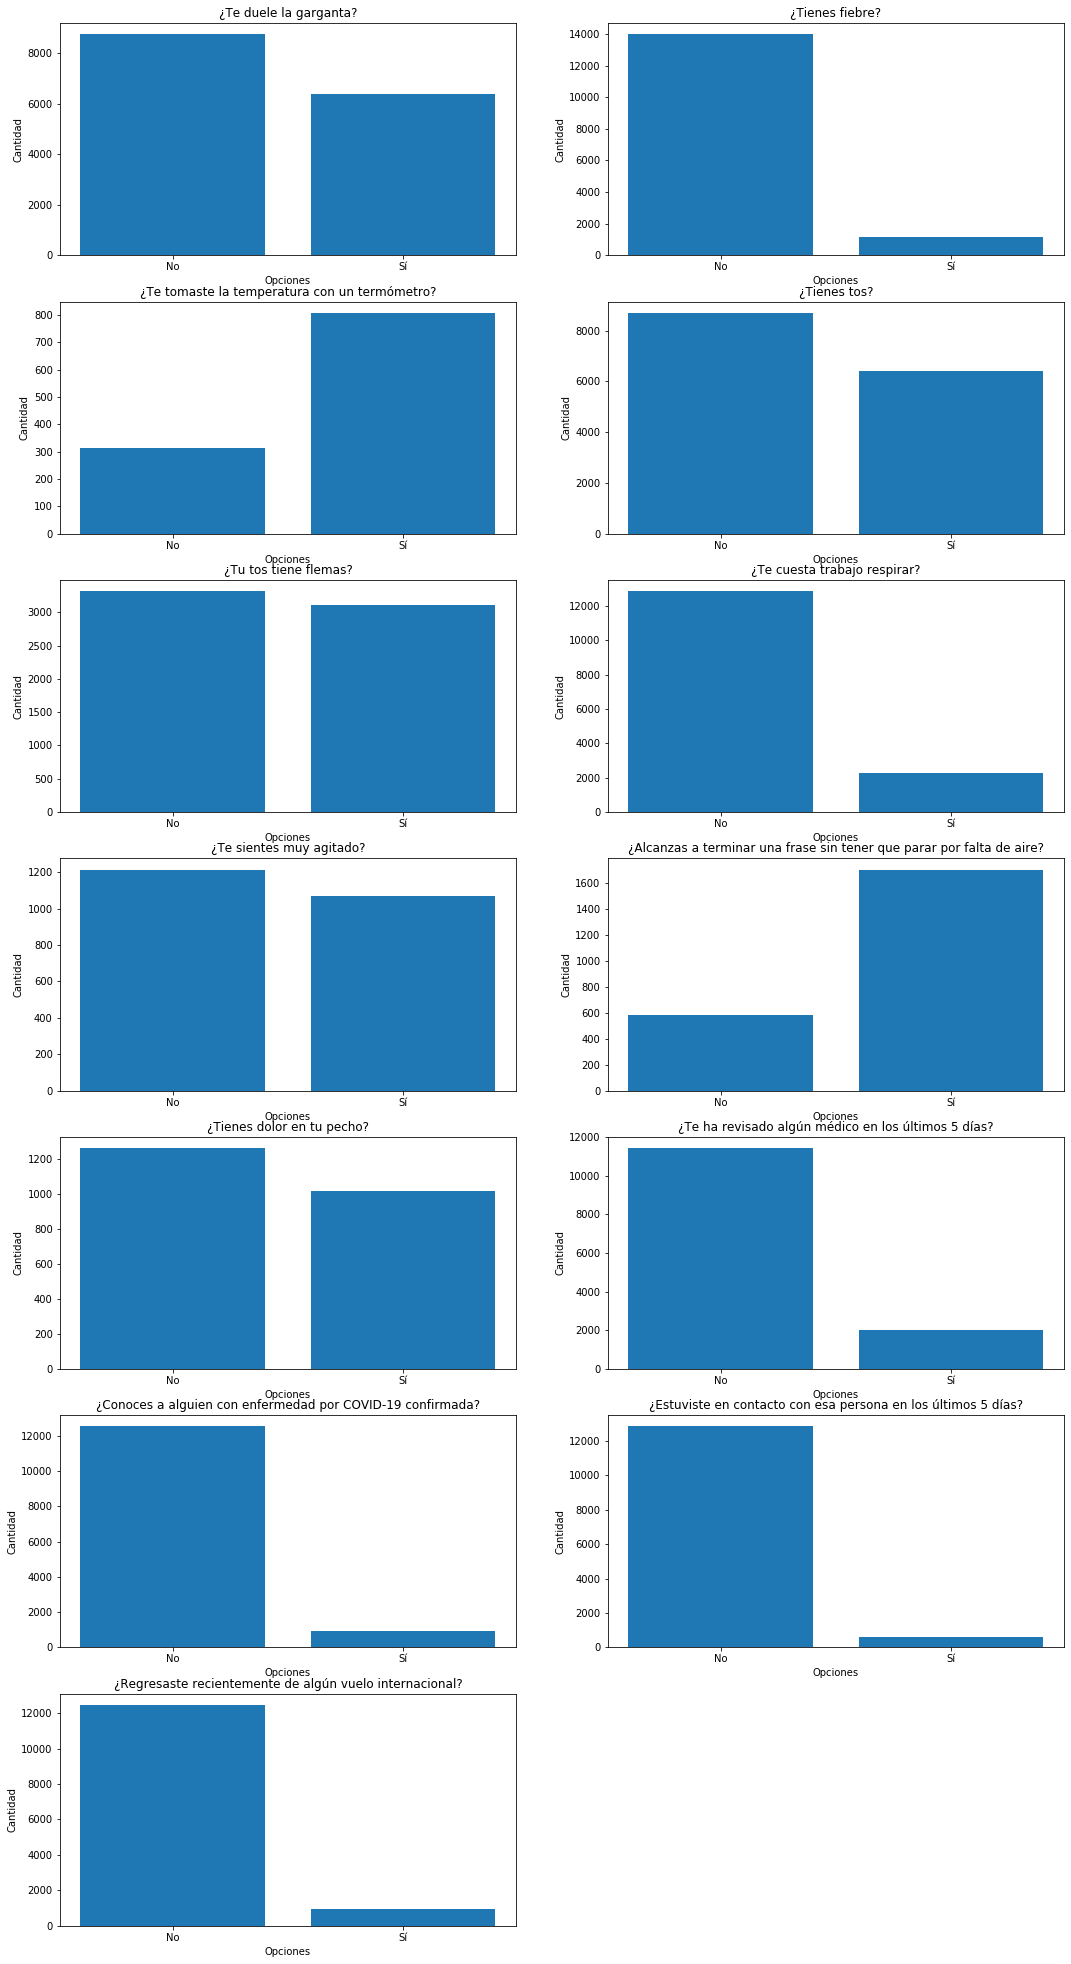

In [17]:
#Graficando las preguntas cuyas respuestas son No y Sí
plt.figure(figsize=(18,35))
for i in range(len(si_no.columns)):
    si_no_group=si_no.iloc[:,i]
    si_no_group=si_no_group.groupby(si_no_group).describe().reset_index()
    #print(si_no_group)
    pos=i+1
    plt.subplot(7, 2, pos)
    plt.title(si_no_group.columns[0])
    plt.bar(si_no_group[si_no_group.columns[0]].astype(str),si_no_group["count"])
    plt.xlabel("Opciones")
    plt.ylabel("Cantidad")
plt.show()

In [19]:
Ubi_fecha=covidF1[['Marca temporal','Edad','Ciudad']]

In [20]:
Puntuacion=covidF1[['Puntuación']].rename(columns={'Puntuación' : 'puntua'})

In [21]:
cont=0
for i in range(len(Puntuacion['puntua'])):
    try:
        if(type(Puntuacion['puntua'][i])!=int):
            print(type(Puntuacion['puntua'][i]),i)

    except Exception as e:
        cont+=1
        print(e,cont,i)

<class 'str'> 2915
13364 1 13364


In [22]:
Puntuacion.loc[ [2915], : ]

,puntua
2915,2 / 10


In [23]:
Puntuacion.drop([2915],inplace=True)

In [24]:
#Agrupando 
data=Puntuacion["puntua"] #se crea la serie
data_group=data.groupby(data).describe().reset_index() #agrupo la serie y reset_index para que se respete la columna de la puntuación

Text(0, 0.5, 'Cantidad')

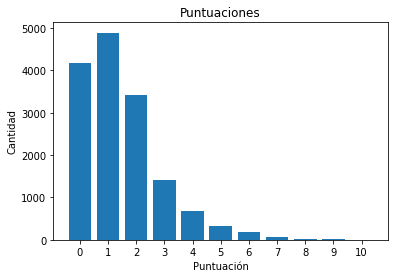

In [25]:
plt.title("Puntuaciones")
plt.bar(data_group[data_group.columns[0]].astype(str),data_group["count"])
plt.xlabel("Puntuación")
plt.ylabel("Cantidad")

- Para ciudades

In [31]:
Ubi_fecha=covidF1[['Edad','Ciudad']]
#Ubi_fecha["dia"]=Ubi_fecha['Marca temporal']

In [32]:
len(covidF1)-len(covidF2)#Comparando

48

In [33]:
#Eliminando datos que no tienen nada en ciudad y verificando los que no son string (datos raros)
comprobacion=[]
for i in range(len(Ubi_fecha["Ciudad"])):
    try:
        if(type(Ubi_fecha["Ciudad"][i])!=str):
            comprobacion.append(i)
            print(Ubi_fecha.drop([i],inplace=True))
            print(i)
    except Exception as e:
        #comprobacion.append(i)
        print(e,i)

C:\Users\eve\Anaconda3\envs\machineLearningPrueba\lib\site-packages\pandas\core\frame.py:3994: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


None
0
None
1
None
2
None
604
None
617
None
653
None
1029
None
1113
None
1718
None
1748
None
1930
None
3139
None
3873
None
4330
None
4628
None
5460
None
6521
None
7062
None
7204
None
7205
None
7348
None
7349
None
7357
None
8322
None
8323
None
8325
None
8353
None
9834
None
10188
None
10315
None
10454
None
10455
None
10490
None
10642
None
11068
None
11647
None
11746
None
11819
None
11820
None
11865
None
11928
None
12138
None
12266
None
12443
None
12796
None
12847
13364 13364
None
13862
None
13863
None
13865


In [34]:
#Verificando que realmente los datos anteriores se encuentren en NaN en el dataset
covidF1.loc[comprobacion]

,Marca temporal,Dirección de correo electrónico,Puntuación,Edad,Ciudad,Colonia,Teléfono de contacto,¿Te duele la garganta?,¿Tienes fiebre?,¿Cuántos días tienes con fiebre?,...,¿Tienes dolor en tu pecho?,¿Te ha revisado algún médico en los últimos 5 días?,¿Dónde?,¿Conoces a alguien con enfermedad por COVID-19 confirmada?,¿Estuviste en contacto con esa persona en los últimos 5 días?,¿Regresaste recientemente de algún vuelo internacional?,¿Hace cuánto tiempo regresaste de tu viaje?,¿Estuviste en alguno de los siguientes países?,Código postal,Contestado
0,2020-03-18 09:41:11.924000,NaN,4,32,NaN,Atemajac del Valle,3.312051e+09,No,Sí,NaN,...,Sí,No,NaN,No,No,Sí,NaN,Alemania,NaN,NaN
1,2020-03-18 09:54:55.465000,jhugosaldor@gmail.com,4,30,NaN,Lomas de Zapopan,3.310968e+09,Sí,No,NaN,...,NaN,Sí,NaN,Sí,No,Sí,4,"España, Alemania, Francia, Italia, Rep Checa, ...",NaN,NaN
2,2020-03-18 10:03:35.530000,mtezruizlupita@gmail.com,7,28,NaN,La Perla,3.331875e+09,Sí,Sí,3.0,...,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,SIN DATOS18/3/2020 23:07:35,regi094@hotmail.co,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,2020-03-18 23:17:04.749000,dianapatinoj94@gmail.com,0,20,26,La cima de Zapopan,3.313477e+09,No,No,NaN,...,NaN,No,NaN,No,No,No,NaN,NaN,NaN,NaN
653,2020-03-18 23:58:35.137000,amada_arsp@hotmail.com,4,22,23,Alcalde,3.317523e+09,Sí,Sí,7.0,...,NaN,Sí,Privado,No,Sí,No,NaN,NaN,NaN,YA
1029,2020-03-19 15:17:04.528000,gabrielagalez4@gmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1113,2020-03-19 16:42:28.713000,natalia.ramirezg@alumno.udg.mx,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1718,2020-03-19 23:55:03.589000,cedoniusmacedonio@gmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1748,2020-03-20 00:35:29.168000,agarciamartinez391@gmail.com,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
nuevo=[]
for i in range(len(Ubi_fecha["Ciudad"])):
    try:
            Ubi_fecha["Ciudad"][i]=Ubi_fecha["Ciudad"][i].lower().strip().replace("cdmx","ciudad de mexico")
            Ubi_fecha["Ciudad"][i]=Ubi_fecha["Ciudad"][i].replace("é","e").replace("á","a")
            Ubi_fecha["Ciudad"][i]=Ubi_fecha["Ciudad"][i].replace("í","i").replace("ó","o")
            Ubi_fecha["Ciudad"][i]=Ubi_fecha["Ciudad"][i].replace("ú","u").replace("gdl","guadalajara") # ciudades- edades (falta arreglar)
            nuevo.append([Ubi_fecha["Ciudad"][i].lower(),Ubi_fecha["Edad"][i]])
            print(i)
    except Exception as e:
        #comprobacion.append(i)
        print(e,i)

0 0
1 1
2 2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127

C:\Users\eve\Anaconda3\envs\machineLearningPrueba\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)



128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377

2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214


3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862


5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460 5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508


7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062 7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204 7204
7205 7205


8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860


10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315 10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454 10454
10455 10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
1046

11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746 11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819 11819
11820 11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865 11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
1189

13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
1326

14542
14543
14544
14545
14546
14547
14548
14549
14550
14551
14552
14553
14554
14555
14556
14557
14558
14559
14560
14561
14562
14563
14564
14565
14566
14567
14568
14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
1470

In [36]:
#Creando un dataFrame 
data_cityedad=pd.DataFrame(nuevo,columns=["Ciudad","Edad"])

In [37]:
data_cityedad

,Ciudad,Edad
0,guadalajara,28
1,zapopan,38
2,guadalajara,25
3,puebla,26
4,zacapu michoacan,21
...,...,...
15068,zapopan jal,72
15069,tonala,41
15070,guadalajara,29
15071,guadalajara,27


In [38]:
Ciudades = {}
for ciudad in data_cityedad["Ciudad"]:
    print(ciudad)
  #for Entidad in Texto.ents:
    if(Ciudades.get(ciudad) == None):
          Ciudades.setdefault(ciudad, 1)
    else:
          Ciudades[ciudad] = Ciudades[ciudad] + 1

guadalajara
zapopan
guadalajara
puebla
zacapu michoacan
guadalajara
cuquio
zapopan
guadalajara
puebla
mexicali
colima
torreon
guadalajara
zapotlanejo
baja california norte
tlajomulco
monterrey
arandas
la paz bcs
manta
guadalajara
zapopan
guadalajara
guadalajara
tamazula, jalisco
zapopan
toluca
zapopan
guadalajara
torreon
tampico tamaulipas
merida
zapopan
guadalajara
guadalajara
ciudad de mexico
tlaquepaque
toluca
guadalajara
toluca
guadalajara
guadalajara
guadalajara
puebla
zapopan
san juan del rio, queretaro
ciudad de mexico
guadalajara
guadalajara
guadalajara
guadalajara
guadalajara
puebla
guadalajara
tepatitlan
zapopan
hidalgo, michoacan
guadalajara
empalme
adolfo lopez mateos
zapopan
morelia
colima
guzman
guadalajara
guadalajara
guadalajara
toluca
ciudad de mexico
guadalajara
guadalajara
guadalajara
zapopa
zapopan
guadalajara
zapotlanejo
cd. hidalgo
tonala
guadalajara
guadalajara
zapopan
guadalajara
guadalajara
guadalajara
ciudad de mexico
guadalajara
tampico
guadalajara
zapopan
gu

ciudad de mexico
guadalajara
zapopan
tlaquepaque
guadalajara
guadalajara
guadalajara
guadalajara
queretaro
tijuana
guadalajara
guadalajara
zapopan
tlaquepaque
zapopan
guadalajara
guadalajara
guadalajara
guadalajara
tlaquepaque
mexico
queretaro
tlaquepaque
zapopan
guadalajara
zapopan jalisco
zapopan jalisco
zapopan
puebla
tlaquepaque
guadalajara
guadalajara
aqui alla
zapopan
guadalajara
zapopan
ciudad de mexico
guadalajara
jalisco
guadalajara
piedras negras
zapopan
tonala
guadalajara
tlaquepaque
arandas
guadalajara
guadalajara
guadalajara
guadalajara
mazatlan sinaloa
zapopan
guadalajara
zapopan
zapopan
guadalajara
zapopan
gudalajara
guadalajara
guadalajara
zapopan
ciudad de mexico
guadalajara
zapopan
guadalajara
guadalajara
tonala
guadalajara
guadalajara
navolato
zapopan
zapopan
guadalajara
jalisco
merida
tlaquepaque
guadalajara
guadalajara
morelia
guadalajara
tlajomulco de zuñiga
guadalajara
guadalajara
chihuahua
tlaquepaque
zapopan
guadalajara
guadalajara
guadalajara
ameca
guadalajara

guadalajara
tlaquepaque
guadalajara
zapopan
ramos arizpe
guadalajara
guadalajara
acatzingo
tala
zapopan
arandas
zapopan
zapopan
zapopan
tlaxcala
zapopan
zapopan
tlaquepaque
guadalajara
michoacan
michoacan
zapopan
puebla
zapopan
bahia de bandera
zapopan
zapopan
guadalajara
tapachula
oakland
zapopan
tepic
guadalajara
guadalajara
puebla
piedraanegraa
tlaquepaque
guadalajara
guadalajara
mazatlan
zapopan
guadalajara
guadalajar
guadalajar
guadalajara
guadalajara
guadalajara
chiapas
guadalajara
guadalajara
zapopan
guadalajara
zapopan
queretaro
tlaquepaque
tlaquepaque
tangancicuaro
slp
guadalajara
guadalajara
guadalajara
villahermosa
guadalajara
zapopan
zapopan
tlajomulco de zuñiga
yahualica
guadalajara
guadalajara
guadalajara
pullman
zapopan
tonala
ciudad de mexico
mazatlan
guadalajara
zapopan
tonala
zapopan
los cabos
salamanca
tonala
guadalajara
jahe
guadalajara
guadalajara
zapopan
guadalajara
guadalajara
guadalajara
zapopan
guadalajara
tonala
ciudad de mexico
zapopan
zapopan
guadalajara e
t

zapopan
guadalajara
yahualica de gonzalez gallo
tlaquepaque
guadalajara
zapopan
guadalajara
zapopan
san julian
guadalajara
guadalajara
guadalajara
tepatitlan
guadalajara
san pedro tlaquepaque
zapopan
guadalajara
baldwin park
guadalajara
zapotlan el grande
zapopan
tlajomulco d zuñiga
zapopan
guadalajara
zacatecas
morelia
guadalajara
zapopan
zapopan
guadalajara
san cristobal de las casas
guadalajara
cabo san lucas
lagos de moreno
guadalajara
guadalajara
por tus pujidos
arandas
guadalajara
managua
arandas
jalostotitlan
guadalajara
zapopan
yahulica
guadalajara
zapopan
zapopan
guadalajara
guadalajara
guadalajara
zapopan
aguascalientes
zapopan
tepatitlan
zapopan
guadalajara
tepatitlan
guadalajara
los mochis sinaloa
guadalajara
jalisco
el salto
aguascalientes
tlajomulco de zuñiga
san miguel de allende
guadalajara
tapalpa
zapopan
guadalajara
aguascalientes
zapopan
zapopan
acatic
yahualica
zapopan
guanajuato
guadalajara
guadalajara
guadalajara
guadalajara
guadalajara
la barca
zapopan
guadalajar

guaymas
hhh
guadalajara
guadalajara
jalisco
zapopan
zapopan
guadalajara
xalapa
zapopan
guadalajara
guadalajara
puebla
guagalajara
jalisco
guadalajara
ocotlan
zapopan
guadalajara
guadalajara
guadalajara
chiautla
puebla
zapopan
ciudad de mexico
tonala
guadalajara
la barca
zapopan
queretaro
guadalajara
guadalajara
guadalajara
guadalajara
mexico
guadalajara
jalisco
playa del carmen, q. roo
playa del carmen, q. roo
guadalajara
guadalajara
irapuato
guadalajara
ciudad de mexico
guadalajara
ramos arizpe
zapopan jalisco
ocotlan
zapopan
aguascalientes
guadalajara
zapopan
la piedad
tlaquepaque
guadalajara
tequila
guadalajara
guadalajara
guadalajara
guadalajara
zapopan
guadalajara
tlajomulco de zuñiga
zapopan
tepic
zapopan
guadalajara
guadalupe
zapopan
tepatitlan de morelos
arandas
pachuca
guadalajara
guadalajara
los mochis
zapopan
cd. guzman jalisco
guadalajara
guadalajara
zapopan
zapopan
hidalgo
redlands
guadalajara jalisco
tlajomulco
guadalajara
zapopan
santiago
guadalajara
zapopan
guadalajara


queretaro
zapopan
cancun
guadalajara
guadalajara
zapopan
guadalajara
guadalajara
zapopan
ciudad de mexico
tlaquepaque
zapopan
guadalajara
lagos
guadalajara
zapopan
colotlan
zapopan
guadalajara
guadalajara
tepic
zapopan
guadalajara
zapotlanejo
guadalajara
guadalajara
morelia
tonala
guadalajara
guadalajara
guadalajara
guadalajara
jalisco
cuernavaca morelos
guadalajara
tlaquepaque
queretaro
guadalajara
guadalajara
guadalajara
guadalajara
el salto
santa catarina
guadalajara
guadalajara
zapopan
zapopan
tepatitlan de morelos
tepic
guadalajara
zapopan , jalisco
guadalajara
tlaquepaque
guadalajara
guadalajara
morelos
guadalajara
zapopan
colima
zapopan
guadalajara
tlaquepaque
zapopan
tlaquepaque
guadalajara
tepatitlan
san miguel el alto jalisco
guadalajara
estado de mexico
guadalajara
hillo
guadalajara
zapopan
d
queretaro
guadalajara
tlaquepaque
san miguel el alto jalisco
ensenada
guadalajara
guadalajara
zapopan
san luis rio colorado
guadalajara
zapopan
guadalajara
zapopan
zapopan
ocotlan
zapop

torreon
guadalajara
cancun
tepatitlan
mexico
zapopan
cancun
zapopan
guerrero
guadalajara
ciudad de mexico
puebla
aguascalientes
puebla
guadalajara
guadalajara
puebla
morelia
zapopan
tijuana
tlaquepaque
mazatlan
riverside
puebla
guadalajara
san salvador
zapopan
amg tlajomulco de zuñiga
guadalajara
guadalajara
zapopan
guadalajara
zacatecas
guadalajara
guadalajara jal
puebla
zapopan
guadalajara
zapopan
guadalajara
sevilla
ciudad de mexico
villahermosa
guadalajara
merida
guadalajara
puerto vallarta
mexico
tonala
guadalajara
guadalajara
zapopan
guadalajara
atotonilco el alto jalisco
monterrey
guadalajara
guadalajara
puebla
guadalajara
guadalajara
gualajara
guadalajara jalisco
colima
chihuahua
barcelona
xalapa
guadalajara
zapopan
tlaquepaque
qro
tlaquepaque
morelia
zapopan
colima
bahia de banderas
san luis potosi
guadalajara
metepec
guadalajara
guadalajara
guadalajara
guadalajara
tepic
torreon
monterrey
huadalajra
durango
zacatecas
puebla
la barca
zapopan
guadalajara
guadalajara
ixtlahuacan 

guadalajara
puerto vallarta
zapopan
atizapan de zaragoza
bogota
zapopan
estado de mexico
piedras negras, coahuila
guadalajara
juarez
ciudad de mexico
guadalajara
guadalajara
ciudad de mexico
oaxaca
tamazula jalisco
oaxaca
jalisco
estado de mexico
ejemplo
df
zapopan
tepic
zapopan
tingüindin
guadalajara
zapopan
tepic
zapopan
san juan del rio queretaro
zapopan
juarez
zapopan
ciudad de mexico
ciudad de mexico
tonala
acayucan
guadalajara
san miguel de allende
nayarit
tuxtla gutierrez
nezahualcoyotl
ciudad de mexico
queretaro
xalisco
hidalgo
guadalajara
morelia
guadalajara
guadalajara
puerto vallarta, jalisco
guadalajara, jalisco
mexico
puebla
guadalajara
oaxaca
san cristobal
morelia
san miguel el alto
guadalajara
tlaquepaque
nayarit
tehuacan, puebla
ciudad de mexico
paraiso
oluts
tepic, nayarit
guadalajara
aguascalientes
jaja
puerto vallarta
zapopan
juarez
edomex
guadalajara
guadalajara
guadalajara
guadalajara
guadalajara
manzanillo
autlan
emsenada
guadalajara
guadalajara
delicias chihuahua

nuevo laredo
guadalajara
zapopan
atizapan
guadalajara
tlaquepaque
guadalajara
nueva rosita
queretaro
guadalajara
zapopan
guadalajara
zapopan
zapopan
ciudad guzman
jalisco
tonala
cuautla
tlajomulco
guadalajara
zapopan
ciudad de mexico
zapopan
zamora
guadalajara
huejucar jalisco
zapopan
guadalajara
zapopan
guadalajara
ciudad de mexico
zapopan
mty
tepic
zapopan
guadalajara
guadalajara
zapopan
guadalajara
tonala
tlajomulco de zuñiga
zapopan
puebla
guadalajara
ciudad de mexico
estado de mexico
guadalajara
zapopan
guadalajara
guadalajara
zapopan
jocotepec
ciudad de mexico
estado de mexico
guadalajara
chihuahua
ciudad de mexico
zapopan
iguala de la independencia
guadalajara
atemajac, jalisco
mexico
zapopan
mexico
guadalajara
zapopan
zapopan
guadalajara
nueva rosita coahuila
guadalajara
cancun
mexico
tlaquepaque
mexico
zapopan
amacueca
ciudad de mexico
zapopan
zapopan
hondurad
guadalajara
zapopan
guadalajara
guadalajara jal
villa juarez, puebla
cardenas, tabasco
estado de mexico
zapopan
ciudad

zapopan
zapopan
playa del carmen
guadalajara
guadalajara
ciudad de mexico
tlajomulco de zuñiga
guadalajara
ciudad de mexico
zapopan
guadalajara
guadalajara
mexico
veracruz
guadalajara
ixtlahuacan
puerto vallarta
zapopan
leon
acaponeta
tuxpan
guadalajara
zapopan
chapala, jalisco
mecapalapa
ciudad de mexico
zapopan
guadalajara
veracruz
toluca
boca del rio
durango
estado de mexico
gomez palacio
guadalajara
amatitan
guadalajara
alvarado
zapopan
tlajomulco de zuñiga
medico
jalisco
guadalajara
guadalajara
obregon
la barca
guadalajara
ecatepec
zapopan
el salto
guadalajara
ocotlan
guadalajajara
tonala
tlajomulco
tlaxcala
leon
guadalajara
guadalajara
ciudad de mexico
ciudad de mexico
el grullo
zapopan
puebla
morelia
ciudad de mexico
san pedro tlaquepaque
guadalajara
nezahualcoyotl
guadalajara
jalisco
zapopan
guadalajara
monterrey
puebla
zapopan
zapopan
torreon
guadalajara
guadalajara
ciudad de mexico
zapopan, jalisco
puebla
guadalajara
ciudad de mexico
guadalajara
jalisco
tonala
guadalajara
mex

In [39]:
Ciudades

{'guadalajara': 4930,
 'zapopan': 2222,
 'puebla': 325,
 'zacapu michoacan': 2,
 'cuquio': 3,
 'mexicali': 21,
 'colima': 72,
 'torreon': 54,
 'zapotlanejo': 26,
 'baja california norte': 1,
 'tlajomulco': 175,
 'monterrey': 61,
 'arandas': 47,
 'la paz bcs': 3,
 'manta': 2,
 'tamazula, jalisco': 1,
 'toluca': 64,
 'tampico tamaulipas': 2,
 'merida': 39,
 'ciudad de mexico': 712,
 'tlaquepaque': 321,
 'san juan del rio, queretaro': 2,
 'tepatitlan': 85,
 'hidalgo, michoacan': 1,
 'empalme': 1,
 'adolfo lopez mateos': 3,
 'morelia': 81,
 'guzman': 16,
 'zapopa': 1,
 'cd. hidalgo': 1,
 'tonala': 229,
 'tampico': 15,
 'tuxtla gutierrez': 19,
 'aguascalientes': 60,
 'la barca': 21,
 'mamzanillo': 1,
 'guadaljara': 5,
 'nayarit': 11,
 'xalapa': 30,
 'nuevo laredo': 10,
 'tijuana': 63,
 'pachuca': 31,
 'tepic': 152,
 'degollado': 16,
 'metepec': 17,
 'g': 7,
 'puerto vallarta': 124,
 'tlaquepaque jalisco': 5,
 'tlajomulco de zuñiga': 132,
 'degollado, jalisco': 1,
 'mineral de la reforma': 2

In [ ]:
Ciudades_fil = {}
for clave, valor in zip(Ciudades.keys(), Ciudades.values()):
  if(valor >= 50):
    Ciudades_fil.setdefault(clave, valor)
plt.figure(figsize=(18,8))
plt.bar(Ciudades_fil.keys(), Ciudades_fil.values()) 
plt.title('Ciudades')
plt.ylabel("Respuesta total de personas")
plt.xlabel("Nombre de la ciudad")
plt.xticks(rotation = 70)
plt.show()

- Días con tos

In [42]:
#Preguntas faltantes para gráficar
faltantes=covidF1[['¿Cuántos días tienes con tos?','¿Cuántos días tienes con fiebre?',
                   '¿Cuánto registró el termómetro?', '¿Qué has tomado para la fiebre?',
        '¿Qué has tomado para la tos?',
        '¿Dónde?',
       '¿Hace cuánto tiempo regresaste de tu viaje?',
       '¿Estuviste en alguno de los siguientes países?',
       'Contestado']]

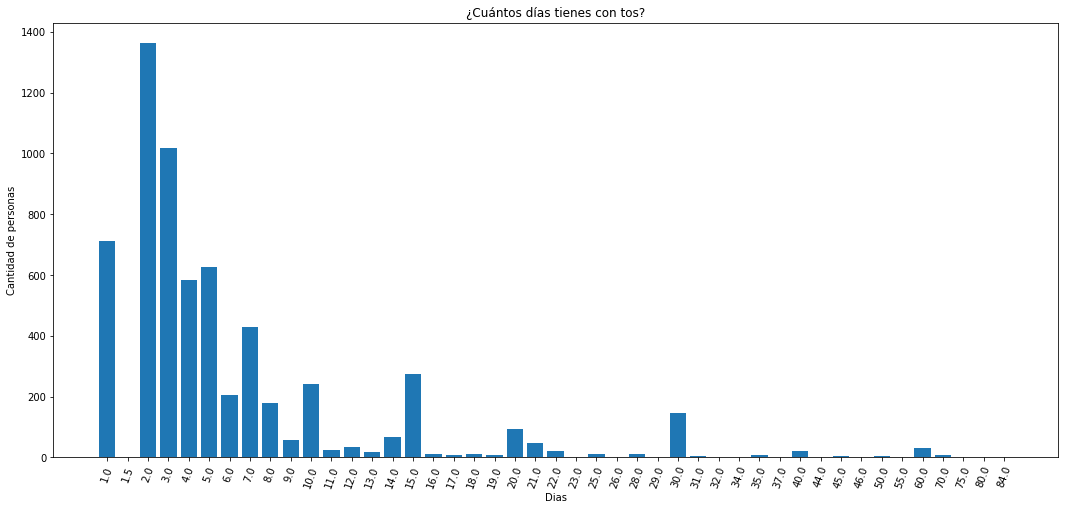

In [43]:
dias_tos=faltantes[['¿Cuántos días tienes con tos?']]
dias_tos=dias_tos.dropna()
#dias_tos
#covidF1[(covidF1["Edad"].astype(float))>101]
dias_tos=dias_tos[(dias_tos.iloc[:,:]).astype(int)<90]
dias_t=dias_tos['¿Cuántos días tienes con tos?']
dias_tosgroup=dias_t.groupby(dias_t).describe().reset_index()
plt.figure(figsize=(18,8))
plt.title(dias_tosgroup.columns[0])
plt.bar(dias_tosgroup[dias_tosgroup.columns[0]].astype(str),dias_tosgroup["count"])
plt.xlabel("Dias")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation = 70)
plt.show()

- Días con fiebre

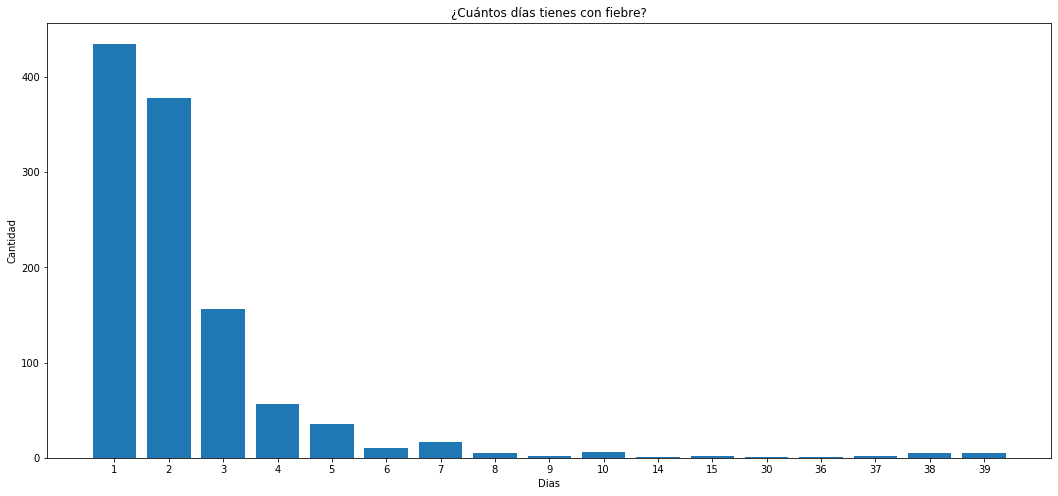

In [44]:
dias_fie=faltantes[['¿Cuántos días tienes con fiebre?']]
dias_fie=dias_fie.dropna()
dias_fie
dias_fie=(dias_fie.iloc[:,:]).astype(int)
dias_f=dias_fie['¿Cuántos días tienes con fiebre?']
dias_fiegroup=dias_f.groupby(dias_f).describe().reset_index()
plt.figure(figsize=(18,8))
plt.title(dias_fiegroup.columns[0])
plt.bar(dias_fiegroup[dias_fiegroup.columns[0]].astype(str),dias_fiegroup["count"])
plt.xlabel("Dias")
plt.ylabel("Cantidad")
plt.show()

- Cuanto registro el termómetro

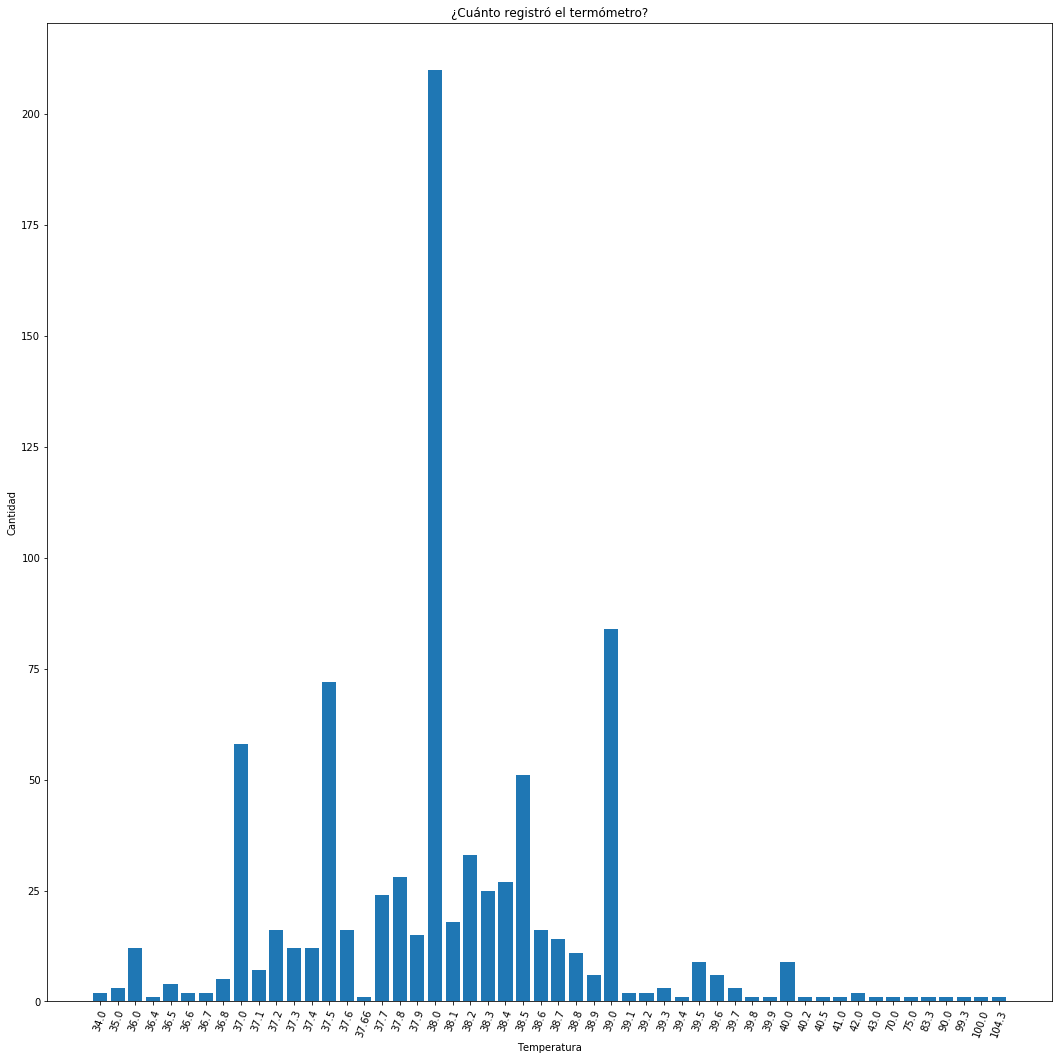

In [45]:
termometro=faltantes[['¿Cuánto registró el termómetro?']]
termometro=termometro.dropna()
termometro
termometro=termometro[(termometro.iloc[:,:]).astype(float)>30]
termometro_f=termometro['¿Cuánto registró el termómetro?']
termo_group=termometro_f.groupby(termometro_f).describe().reset_index()
#termo_group
plt.figure(figsize=(18,18))
plt.title(termo_group.columns[0])
plt.bar(termo_group[termo_group.columns[0]].astype(str),termo_group["count"])
plt.xlabel("Temperatura")
plt.ylabel("Cantidad")
plt.xticks(rotation = 70)
plt.show()

- ¿Estuviste en algún país en el extranjero?

In [46]:
paises=faltantes[['¿Estuviste en alguno de los siguientes países?']]
paises_viaje=paises.dropna()
paises_viaje

,¿Estuviste en alguno de los siguientes países?
0,Alemania
1,"España, Alemania, Francia, Italia, Rep Checa, ..."
8,Estados Unidos
23,No
24,"España, Hungría"
...,...
15053,Estados Unidos
15073,Estados Unidos
15081,Estados Unidos
15083,Brasil


In [47]:
city_ext=[]
for i in range(len(paises_viaje)):
    temp=paises_viaje.iloc[i,0].split(",")
    for j in range(len(temp)):
        city_ext.append(temp[j].lower().strip()) #Agrupando
print(city_ext)

['alemania', 'españa', 'alemania', 'francia', 'italia', 'rep checa', 'inglaterra', 'estados unidos', 'no', 'españa', 'hungría', 'estados unidos', 'españa', 'estados unidos', 'hungría', 'inglaterra', 'irlanda', 'escocia (todos en un tiempo menor a un mes)', 'colombia', 'estados unidos', 'españa', 'francia', 'italia', 'estados unidos', 'guatemala', 'francia', 'estados unidos', 'españa', 'alemania', 'italia', 'estados unidos', 'estados unidos', 'estados unidos', 'estados unidos', 'estados unidos', 'españa', 'francia', 'estados unidos', 'estados unidos', 'estados unidos', 'estados unidos', 'republica dominicana', 'estados unidos', 'españa', 'alemania', 'italia', 'la habana', 'no', 'españa', 'alemania', 'francia', 'italia', 'españa', 'alemania', 'francia', 'italia', 'estados unidos', 'china', 'estados unidos', 'reino unido', 'merida', 'estados unidos', 'estados unidos', 'canadá', 'estados unidos', 'inglaterra', 'estados unidos', 'españa', 'alemania', 'inglaterra', 'estados unidos', 'estados

In [48]:
len(city_ext)

1304

In [49]:
#Creando diccionaro, creo llave y agrupo
Cit_ext = {}
for ciity in city_ext:
    print(ciity)
    if(Cit_ext.get(ciity) == None):
          Cit_ext.setdefault(ciity, 1)
    else:
          Cit_ext[ciity] = Cit_ext[ciity] + 1

alemania
españa
alemania
francia
italia
rep checa
inglaterra
estados unidos
no
españa
hungría
estados unidos
españa
estados unidos
hungría
inglaterra
irlanda
escocia (todos en un tiempo menor a un mes)
colombia
estados unidos
españa
francia
italia
estados unidos
guatemala
francia
estados unidos
españa
alemania
italia
estados unidos
estados unidos
estados unidos
estados unidos
estados unidos
españa
francia
estados unidos
estados unidos
estados unidos
estados unidos
republica dominicana
estados unidos
españa
alemania
italia
la habana
no
españa
alemania
francia
italia
españa
alemania
francia
italia
estados unidos
china
estados unidos
reino unido
merida
estados unidos
estados unidos
canadá
estados unidos
inglaterra
estados unidos
españa
alemania
inglaterra
estados unidos
estados unidos
estados unidos
estados unidos
españa
alemania
estados unidos
alemania
francia
londres
dinamarca y paises bajos
estados unidos
españa
francia
italia
inglaterra
españa
italia
estados unidos
italia
españa
franc

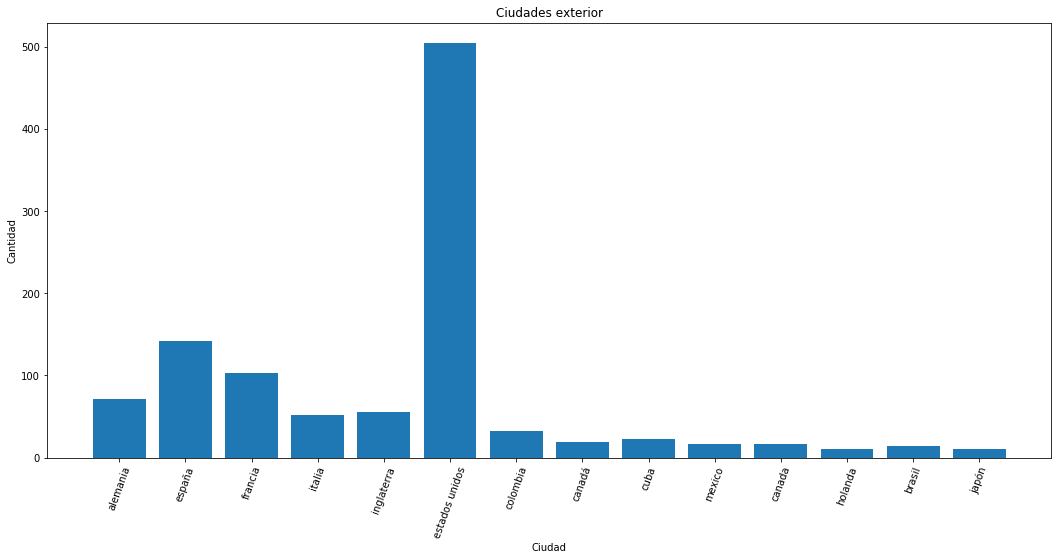

In [50]:
cities_fil = {}
for clave, valor in zip(Cit_ext.keys(), Cit_ext.values()):
  if(valor >= 10):
    cities_fil.setdefault(clave, valor)
plt.figure(figsize=(18,8))
plt.bar(cities_fil.keys(), cities_fil.values()) 
plt.title('Ciudades exterior') 
plt.xlabel("Ciudad")
plt.ylabel("Cantidad")
plt.xticks(rotation = 70)
plt.show()

In [51]:
for w in sorted(cities_fil, key=cities_fil.get, reverse=True):
    print(w, cities_fil[w])

estados unidos 504
españa 142
francia 103
alemania 71
inglaterra 55
italia 52
colombia 32
cuba 22
canadá 19
canada 17
mexico 16
brasil 14
japón 11
holanda 10


In [52]:
covidF1.head()

,Marca temporal,Dirección de correo electrónico,Puntuación,Edad,Ciudad,Colonia,Teléfono de contacto,¿Te duele la garganta?,¿Tienes fiebre?,¿Cuántos días tienes con fiebre?,...,¿Tienes dolor en tu pecho?,¿Te ha revisado algún médico en los últimos 5 días?,¿Dónde?,¿Conoces a alguien con enfermedad por COVID-19 confirmada?,¿Estuviste en contacto con esa persona en los últimos 5 días?,¿Regresaste recientemente de algún vuelo internacional?,¿Hace cuánto tiempo regresaste de tu viaje?,¿Estuviste en alguno de los siguientes países?,Código postal,Contestado
0,2020-03-18 09:41:11.924000,NaN,4,32,NaN,Atemajac del Valle,3.312051e+09,No,Sí,NaN,...,Sí,No,NaN,No,No,Sí,NaN,Alemania,NaN,NaN
1,2020-03-18 09:54:55.465000,jhugosaldor@gmail.com,4,30,NaN,Lomas de Zapopan,3.310968e+09,Sí,No,NaN,...,NaN,Sí,NaN,Sí,No,Sí,4,"España, Alemania, Francia, Italia, Rep Checa, ...",NaN,NaN
2,2020-03-18 10:03:35.530000,mtezruizlupita@gmail.com,7,28,NaN,La Perla,3.331875e+09,Sí,Sí,3.0,...,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-18 10:09:09.460000,joelini.inq@gmail.com,2,28,Guadalajara,Alcalde barranquitas,3.314708e+09,Sí,No,NaN,...,NaN,No,0,No,No,No,NaN,NaN,NaN,NaN
4,2020-03-18 10:29:47.497000,anba_osabel@hotmail.com,3,38,Zapopan,Unidad habitacional UAG,3.314667e+09,Sí,No,NaN,...,NaN,Sí,ISSSTE,Sí,No,No,NaN,NaN,NaN,NaN


- Riesgo

In [62]:
data_group["Riesgo"]=["Bajo","Bajo","Bajo","Medio","Medio","Medio","Medio","Alto","Alto","Alto","Alto"]
ds=data_group.groupby(["Riesgo","puntua"])

In [63]:
data_group

,puntua,count,unique,top,freq,Riesgo
0,0,4162,1,0,4162,Bajo
1,1,4888,1,1,4888,Bajo
2,2,3429,1,2,3429,Bajo
3,3,1400,1,3,1400,Medio
4,4,686,1,4,686,Medio
5,5,318,1,5,318,Medio
6,6,193,1,6,193,Medio
7,7,59,1,7,59,Alto
8,8,22,1,8,22,Alto
9,9,8,1,9,8,Alto


In [64]:
ds.groups

{('Alto', 7): Int64Index([7], dtype='int64'),
 ('Alto', 8): Int64Index([8], dtype='int64'),
 ('Alto', 9): Int64Index([9], dtype='int64'),
 ('Alto', 10): Int64Index([10], dtype='int64'),
 ('Bajo', 0): Int64Index([0], dtype='int64'),
 ('Bajo', 1): Int64Index([1], dtype='int64'),
 ('Bajo', 2): Int64Index([2], dtype='int64'),
 ('Medio', 3): Int64Index([3], dtype='int64'),
 ('Medio', 4): Int64Index([4], dtype='int64'),
 ('Medio', 5): Int64Index([5], dtype='int64'),
 ('Medio', 6): Int64Index([6], dtype='int64')}

In [65]:
ds.first()

count  unique  top  freq
Riesgo puntua                          
Alto   7          59       1    7    59
       8          22       1    8    22
       9           8       1    9     8
       10          6       1   10     6
Bajo   0        4162       1    0  4162
       1        4888       1    1  4888
       2        3429       1    2  3429
Medio  3        1400       1    3  1400
       4         686       1    4   686
       5         318       1    5   318
       6         193       1    6   193

In [66]:
ds.first().columns

Index(['count', 'unique', 'top', 'freq'], dtype='object')

In [67]:
ds.groups.keys()

dict_keys([('Alto', 7), ('Alto', 8), ('Alto', 9), ('Alto', 10), ('Bajo', 0), ('Bajo', 1), ('Bajo', 2), ('Medio', 3), ('Medio', 4), ('Medio', 5), ('Medio', 6)])

<Figure size 1296x1296 with 0 Axes>

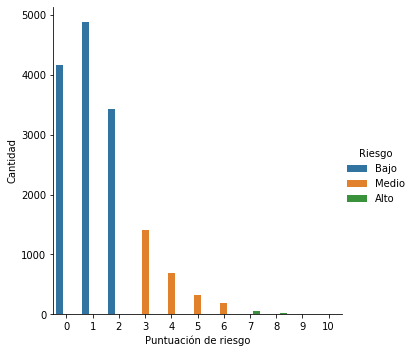

In [68]:
plt.figure(figsize=(18,18))
sn.catplot(x="puntua", y="count",
                hue="Riesgo", #col="Riesgo",
                data=data_group, kind="bar")
                #height=5, aspect=3)
plt.xlabel("Puntuación de riesgo")
plt.ylabel("Cantidad")
plt.show()